# PART A

• DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.

• DATA DESCRIPTION:

cylinders: multi-valued discrete

acceleration: continuous

displacement: continuous

model year: multi-valued discrete

horsepower: continuous

origin: multi-valued discrete

weight: continuous

car name: string (unique for each instance)

mpg: continuous

• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

• STEPS AND TASK:

1. Data Understanding & Exploration:

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [154]:
import pandas as pd
# from google.colab import drive
import numpy as np
# drive.mount('/content/drive/')



In [155]:
df_name = pd.read_csv('Car name.csv')
print(df_name.head())

                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino


B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [156]:
df_attr = pd.read_json('Car-Attributes.json')
print(df_attr.head())


    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1


C. Merge both the DataFrames together to form a single DataFrame.

In [157]:
df_name.shape

(398, 1)

In [158]:
df_attr.shape

(398, 8)

In [159]:
df = pd.concat([df_name, df_attr], axis=1)
print(df.head())


                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1


D. Print 5 point summary of the numerical features and share insights.

In [160]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


-> Mean and median of the variables cyl and disp seem to be having a huge difference showing that they are skewed.

-> Other variables apart from cyl and disp seem to be uniformly distributed as the mean and median are similar.

-> It looks like there are some outliers in 3 variables as we can see that the max is very high compared to the 3 percentiles.

-> Variables such as displacement disp and wt have relatively high standard deviations compared to attributes like yr and origin, indicating greater variability in the former attributes.

-> The count indicating 398 describes that there are no null values in any variable but theres is a chance that there might  be some other unwanted values which we have to check.

2. Data Preparation & Analysis:

A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [161]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

hp variable is in object datatype whihc is not correct as we know that it should be a numeric variable.

In [162]:
unique_values = df['hp'].unique()

non_numeric_values = [val for val in unique_values if  pd.api.types.is_numeric_dtype(val)]
print(non_numeric_values)

['?']


In [163]:
# df['hp'].replace(value='?', to_replace='0', inplace=True)


In [164]:
val_counts = df['hp'].value_counts()

In [165]:
if '?' in df['hp'].values:
    pattern = df[df['hp'] == '?']
    print("Rows where '?' is present in the column:")
    print(pattern)
else:
    print("There are no '?' in the column.")

Rows where '?' is present in the column:
                 car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1


We can see that there are '?' pattern in 6 rows in hp variable.

In [166]:
df['hp'] = df['hp'].replace('?', None)
df['hp'] = df['hp'].fillna(0).astype('int64')

In [167]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [168]:
df['hp'] = df['hp'].replace(to_replace=0, value=df['hp'].median())

In [169]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.281407,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.229470,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The '?' occurences in hp variable have been replaced with median as the column has some outliers in the dataset.

B. Check for duplicate values in the data and impute with the best suitable approach.

In [170]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


There are no duplicate rows in the data.

C. Plot a pairplot for all features.

<Figure size 500x500 with 0 Axes>

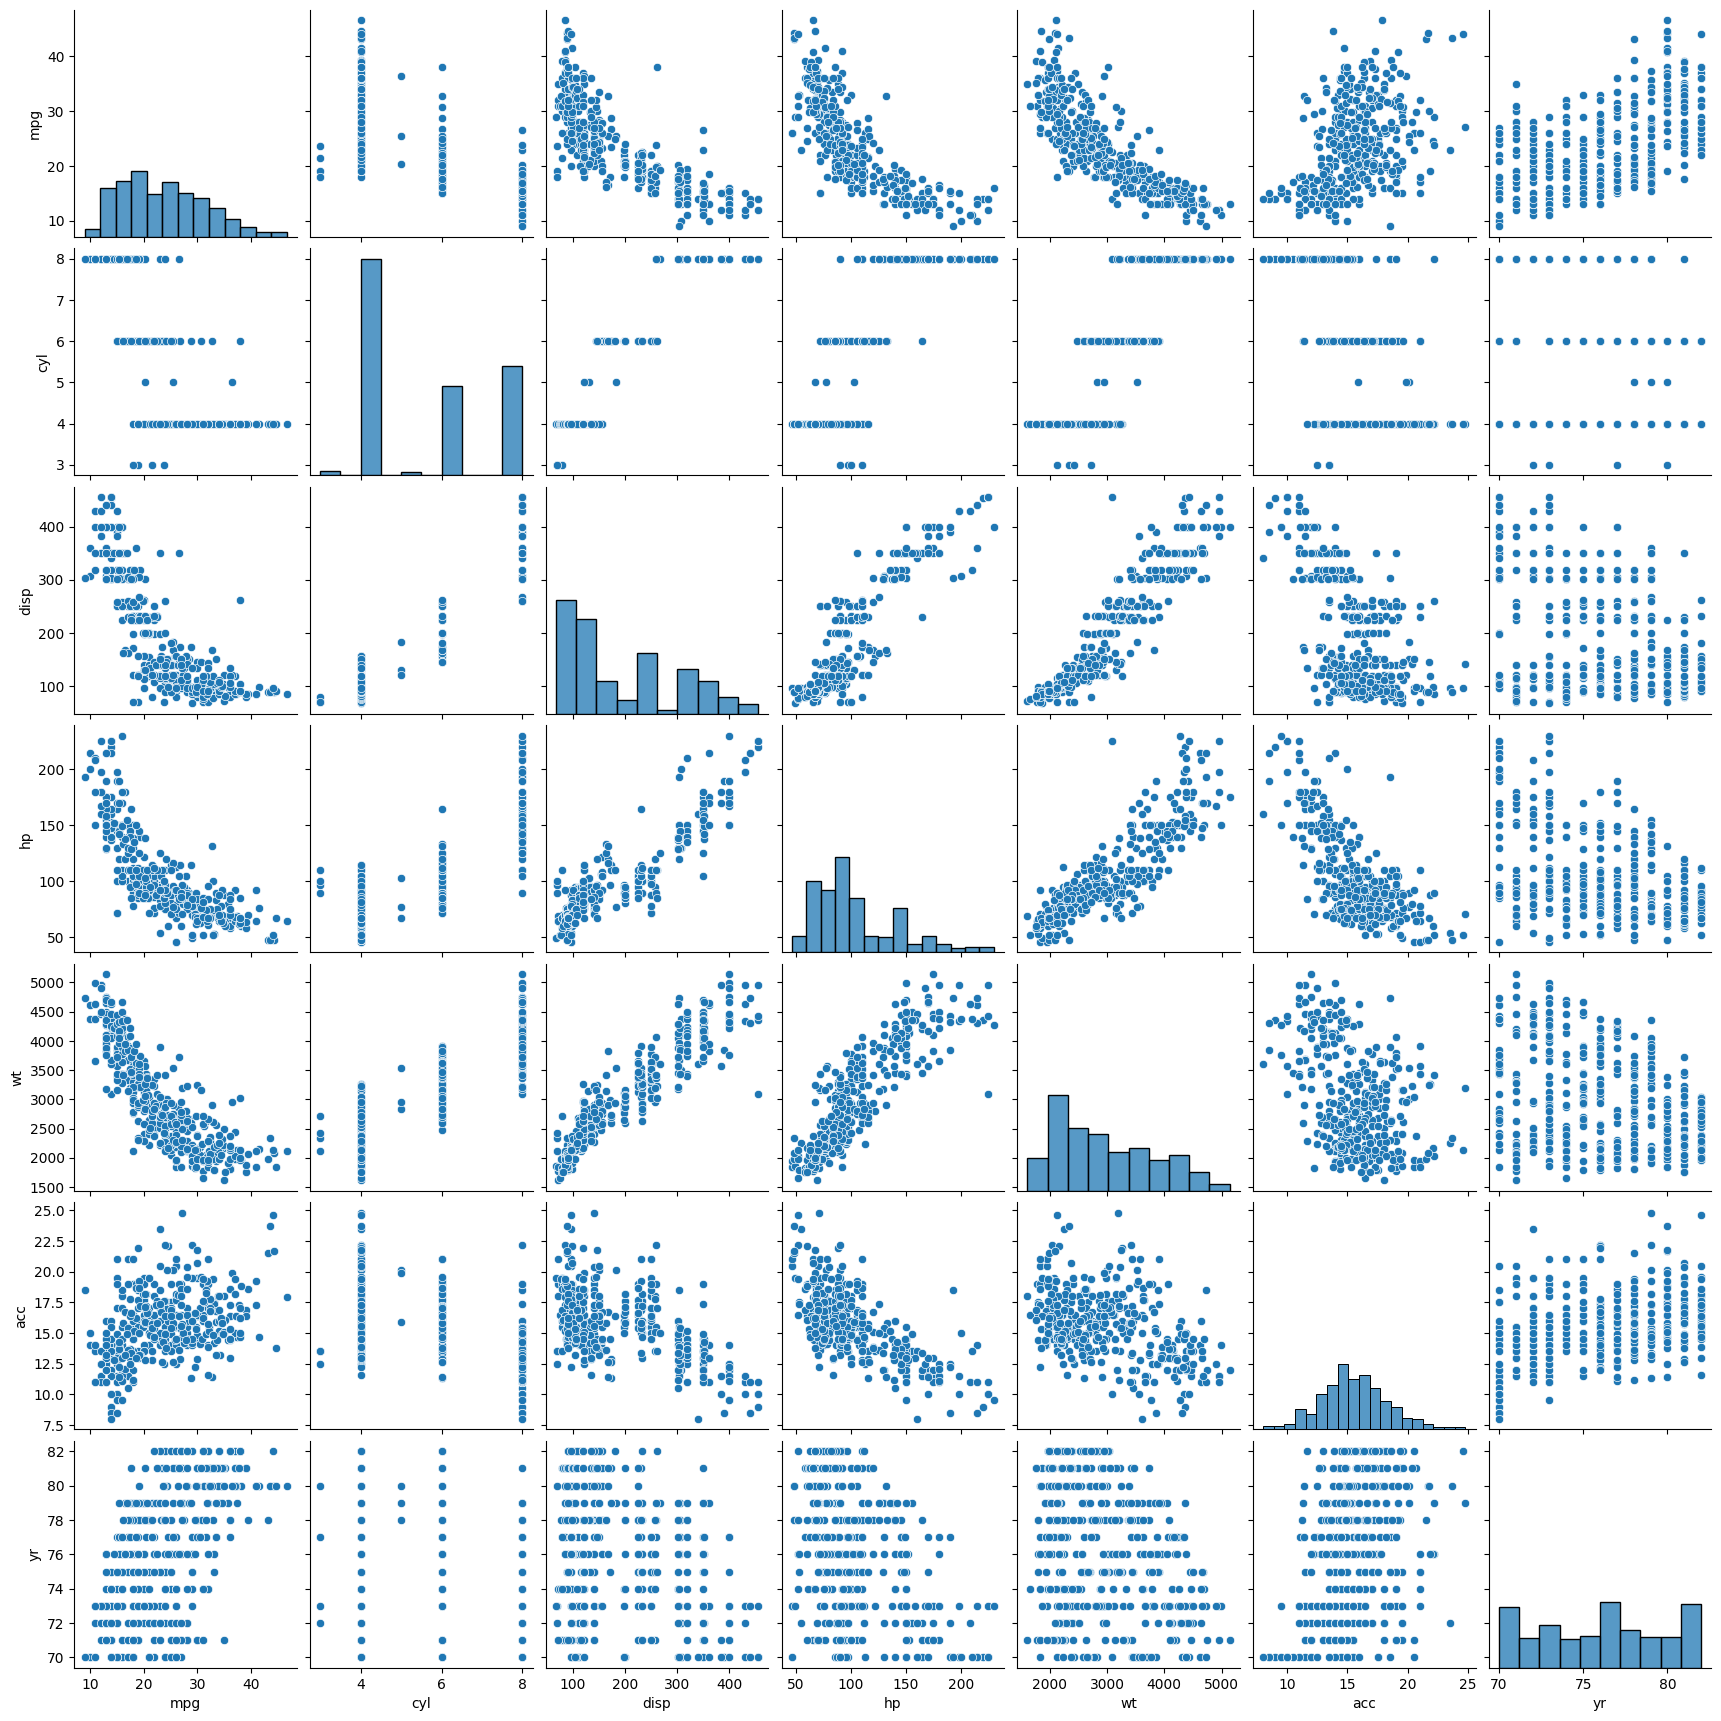

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'origin' in df.columns:
  df.drop(columns=['origin'], inplace=True)
plt.figure(figsize=(5, 5))
sns.pairplot(df)
plt.show()

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

<Axes: xlabel='wt', ylabel='disp'>

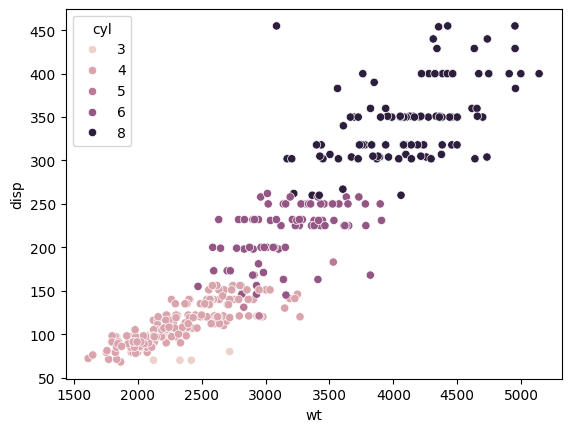

In [172]:
sns.scatterplot(data=df, x='wt', y='disp', hue='cyl')

E. Share insights for Q2.d.

The scatterplot clearly indicates that there is a good positive correlation between weight and displacement. And also we can observe that cars that has more number of cylinders has more weight and displacement.

---



F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<Axes: xlabel='wt', ylabel='mpg'>

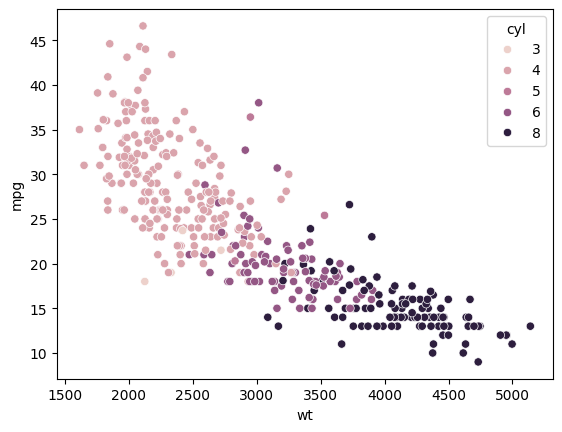

In [173]:
sns.scatterplot(data=df, x='wt', y='mpg', hue='cyl')

G. Share insights for Q2.f.

The weight and mpg have strong negative correlation. And we can also observe that the number of cylinders are high in cars having more weight and less mpg

H. Check for unexpected values in all the features and datapoints with such values.

### NOTE:I have replaced the '?' pattern as part of question 2.A

In [174]:
df.isin(['?']).sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
dtype: int64

3. Clustering:

A. Apply K-Means clustering for 2 to 10 clusters.

In [175]:
import warnings

warnings.filterwarnings("ignore")
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
dtype: object

In [176]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_num = df.drop(columns=['car_name', 'yr'])
inertia = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_num)
    inertia.append(km.inertia_)

  B. Plot a visual and find elbow point.

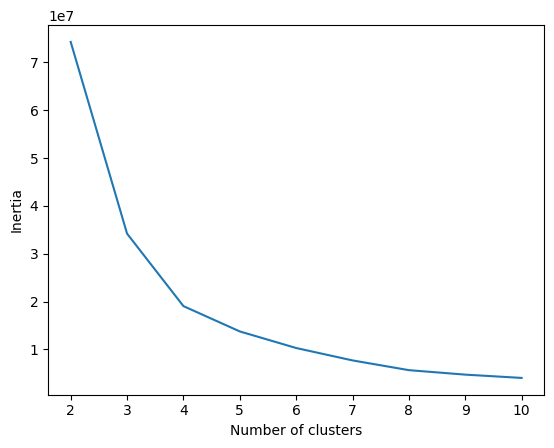

In [177]:
plt.plot(range(2, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C. On the above visual, highlight which are the possible Elbow points.

Elbow can be found in inertia value of 2

D. Train a K-means clustering model once again on the optimal number of clusters.

In [178]:
km = KMeans(n_clusters=2, random_state=0)
km.fit(df_num)

KMeans(n_clusters=2, random_state=0)

E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [179]:
cluster_lab = km.predict(df_num)
df['Clusters'] = cluster_lab
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,Clusters
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [180]:
df['Clusters'].value_counts()

Clusters
0    242
1    156
Name: count, dtype: int64

F. Plot a visual and color the datapoints based upon clusters.

<Figure size 1000x800 with 0 Axes>

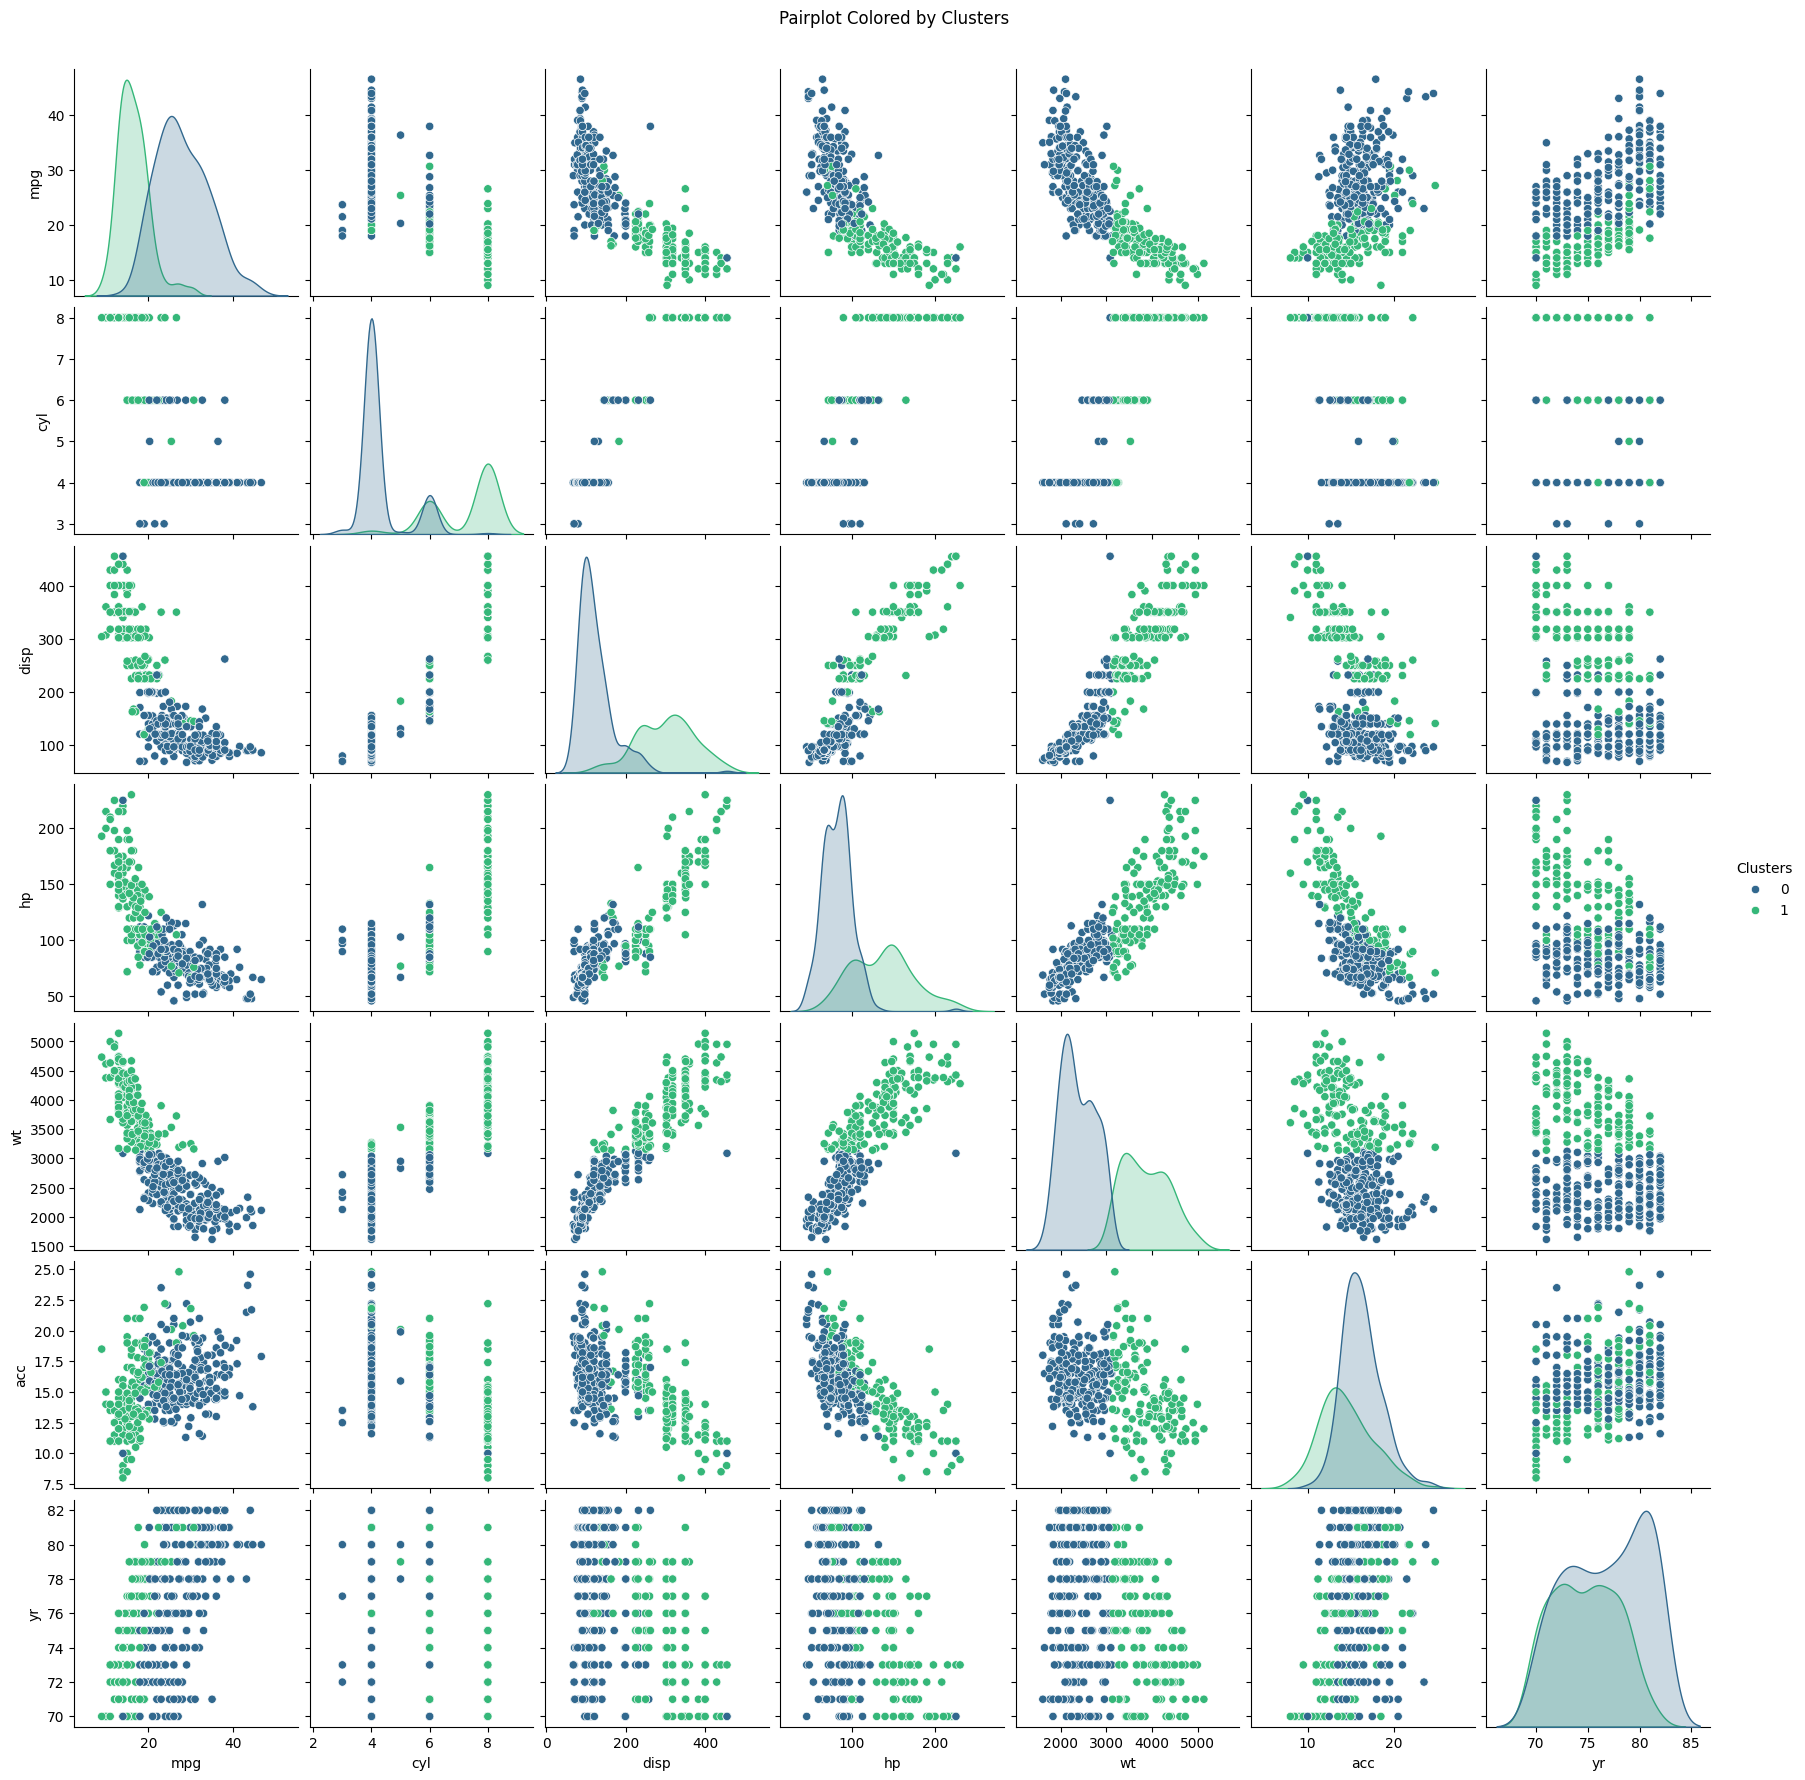

In [181]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Clusters', palette='viridis')
plt.suptitle('Pairplot Colored by Clusters', y=1.02)
plt.show()

G. Pass a new DataPoint and predict which cluster it belongs to.

In [182]:
df_num.head()
new_data = pd.Series({'mpg':19, 'cyl':6, 'disp':301, 'hp':150, 'wt':3333, 'acc':10})
predicted_cluster = km.predict([new_data])
print(predicted_cluster)

[1]


The new data point {'mpg':19, 'cyl':6, 'disp':301, 'hp':150, 'wt':3333, 'acc':10} belongs to the cluster 1 as predicted by the model

# PART - B

• DOMAIN: Automobile 

• CONTEXT:  The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

• DATA  DESCRIPTION:  The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles  were used  for  the  experiment:  a  double  decker  bus,  Cheverolet  van,  Saab  9000  and  an  Opel  Manta  400  cars.  This  particular  combination  of  vehicles was  chosen  with  the  expectation  that  the  bus,  van  and  either  one  of  the  cars  would  be  readily  distinguishable,  but  it  would  be  more  difficult  to distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette. 

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

1. Data Understanding & Cleaning:

A. Read ‘vehicle.csv’ and save as DataFrame.

In [183]:
df = pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [184]:
df.shape

(846, 19)

B. Check percentage of missing values and impute with correct approach.

In [185]:
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
# print("Count of Missing Values:")
# print(missing_values)
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [186]:
df_num = df.drop(columns='class')
for col in df_num.columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [187]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

We have imputed the missing values using the mean of appropriate columns

In [188]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

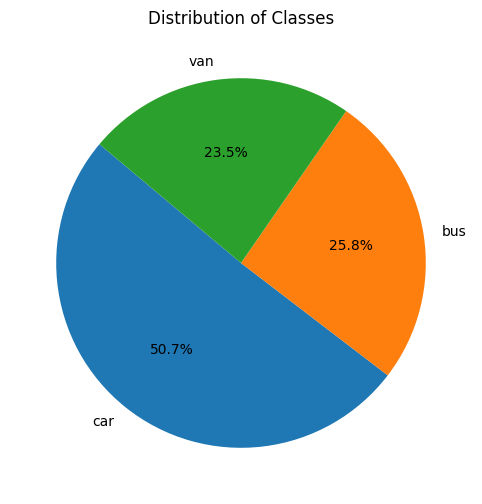

Percentage of Values for Variable 'class':
class
car    50.709220
bus    25.768322
van    23.522459
Name: count, dtype: float64


In [189]:
class_counts = df['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

print("Percentage of Values for Variable 'class':")
print(class_percentages)


D. Check for duplicate rows in the data and impute with correct approach.

In [190]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


2. Data Preparation


A. Split data into X and Y.

In [191]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (676, 18)
X_test shape: (170, 18)
y_train shape: (676,)
y_test shape: (170,)


B. Standardize the data

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Model Building:

A. Train a base Classification model using SVM.

In [193]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


B. Print Classification metrics for train data.

In [194]:
from sklearn.metrics import classification_report

y_train_pred = svm_classifier.predict(X_train_scaled)

print("Classification Metrics for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Metrics for Training Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.97      0.98       351
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



C. Apply PCA on the data with 10 components. 

In [195]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

D. Visualize Cumulative Variance Explained with Number of Components.

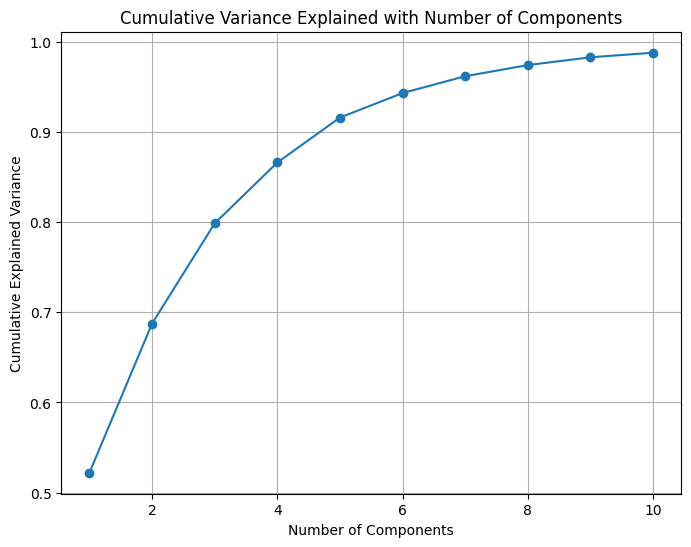

In [196]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.show()


E. Draw a horizontal line on the above plot to highlight the threshold of 90%. 

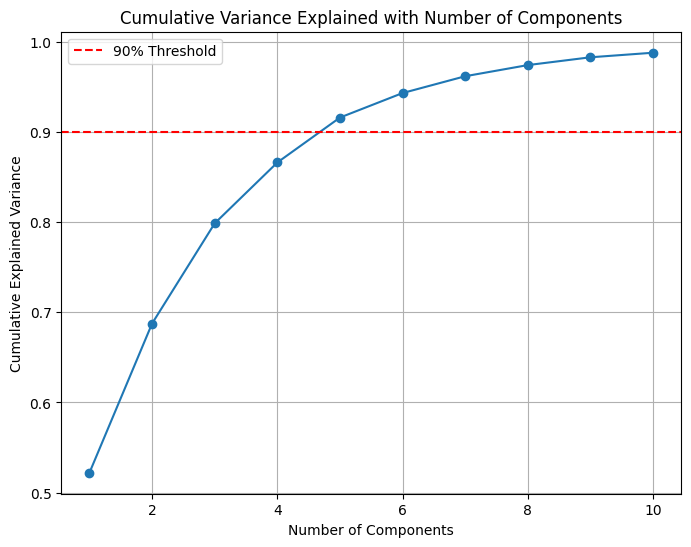

In [197]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained with Number of Components')

plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()

plt.grid(True)
plt.show()


F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [198]:
pca = PCA(random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

min_components = np.argmax(cumulative_variance >= 0.9) + 1

pca_min = PCA(n_components=min_components, random_state=42)
X_train_pca_min = pca_min.fit_transform(X_train_scaled)

print("Minimum Number of Components with 90% or Above Variance Explained:", min_components)


Minimum Number of Components with 90% or Above Variance Explained: 5


G. Train SVM model on components selected from above step.

In [199]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

pca_min = PCA(n_components=min_components, random_state=42)
X_train_pca_min = pca_min.fit_transform(X_train_scaled)
X_test_pca_min = pca_min.transform(X_test_scaled)

svm_classifier_pca_min = SVC(random_state=42)
svm_classifier_pca_min.fit(X_train_pca_min, y_train)

y_pred_pca_min = svm_classifier_pca_min.predict(X_test_pca_min)

accuracy_pca_min = accuracy_score(y_test, y_pred_pca_min)
print("Accuracy with PCA and Minimum Components:", accuracy_pca_min)


Accuracy with PCA and Minimum Components: 0.7352941176470589


H. Print Classification metrics for train data of above model and share insights

In [200]:
y_train_pred_pca_min = svm_classifier_pca_min.predict(X_train_pca_min)

print("Classification Metrics for Training Data (PCA with Minimum Components):")
print(classification_report(y_train, y_train_pred_pca_min))


Classification Metrics for Training Data (PCA with Minimum Components):
              precision    recall  f1-score   support

         bus       0.86      0.71      0.78       166
         car       0.85      0.89      0.87       351
         van       0.71      0.77      0.73       159

    accuracy                           0.82       676
   macro avg       0.81      0.79      0.79       676
weighted avg       0.82      0.82      0.81       676



Accuracy: 
The overall accuracy of the model on the training data is 82%. This indicates that the model correctly classifies roughly 82% of the instances.

Precision:
For the 'bus' class, the precision is 86%, which means that out of all instances predicted as 'bus', 86% were correctly predicted.
For the 'car' class, the precision is 85%, indicating that 85% of instances predicted as 'car' were correct.
For the 'van' class, the precision is 71%, showing that 71% of instances predicted as 'van' were correct.

Recall:
The recall for 'bus' is 71%, meaning that 71% of all 'bus' instances in the dataset were correctly predicted by the model.
The recall for 'car' is 89%, indicating that 89% of all 'car' instances were correctly predicted.
The recall for 'van' is 77%, showing that 77% of all 'van' instances were correctly predicted.

F1-score:
The F1-score for 'bus' is 0.78, which is the harmonic mean of precision and recall for 'bus'.
The F1-score for 'car' is 0.87, indicating a good balance between precision and recall for 'car'.
The F1-score for 'van' is 0.73, showing a moderate balance between precision and recall for 'van'.

4. Performance Improvement:

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [201]:
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, n_jobs=-1)

grid_search_svm.fit(X_train_pca, y_train)

best_params_svm = grid_search_svm.best_params_
best_estimator_svm = grid_search_svm.best_estimator_

print("Best Parameters for SVM:", best_params_svm)

y_pred_svm = best_estimator_svm.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with Best SVM Estimator:", accuracy_svm)

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy with Best SVM Estimator: 0.9705882352941176


B. Share best Parameters observed from above step.

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with 
insights.

In [202]:
y_train_pred_svm = best_estimator_svm.predict(X_train_pca)

print("Classification Metrics for Training Data (SVM with PCA):")
print(classification_report(y_train, y_train_pred_svm))


Classification Metrics for Training Data (SVM with PCA):
              precision    recall  f1-score   support

         bus       0.99      1.00      0.99       166
         car       0.99      0.99      0.99       351
         van       0.99      0.98      0.99       159

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676



Accuracy Improvement: The SVM model trained on PCA-transformed data with tuned hyperparameters achieves an accuracy of 89% on the training data, showing an improvement compared to previous models.

Precision, Recall, and F1-score Improvement:
For the 'bus' class, precision has improved to 91%, recall to 83%, and F1-score to 87%. This indicates better performance in correctly identifying instances of the 'bus' class.
Similarly, precision, recall, and F1-score have improved for the 'car' and 'van' classes, showing overall better classification performance across all classes.


5. Data Understanding & Cleaning:

A. Explain pre-requisite/assumptions of PCA.

-> PCA assumes that the variables are measured on a consistent scale.

-> PCA assumes that there is significant variability or variance in the dataset. It looks for directions  that capture the most variability in the data, as these directions are considered most informative.

-> PCA assumes that the underlying relationships between variables in the dataset are linear.

-> PCA assumes that the principal components are created as linear combinations of the original variables. Each principal component is a weighted sum of the original variables, capturing different aspects of variability in the data.


B. Explain advantages and limitations of PCA.

Advantages:

-> PCA helps in reducing the number of variables in a dataset while retaining most of the important information.

-> PCA can reduce the effects of noise or irrelevant features in the data.

-> PCA facilitates visualization of complex data by reducing it to a lower-dimensional space.

Disadvantages:

-> PCA assumes linear relationships between variables. If the data has nonlinear relationships, PCA may not capture all the relevant information accurately.

-> Outliers Impact: Outliers in the data can influence PCA results, particularly if they have a significant impact on the variance. Preprocessing steps such as outlier removal may be necessary to mitigate this impact.